In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('./hershey') as f:
    lines_ = f.readlines()

lines = []
for d in lines_:
    d = d.rstrip('\n')
    try:
        k = int(d[0:5])  # glyph id
        n = int(d[5:8])  # number of vertices
        lines.append(d)
    except ValueError:
        if len(d) > 0:
            lines[-1] += d
print(len(lines_), len(lines))

glyphs = {}
for d in lines:
    k = int(d[0:5])  # glyph id
    n = int(d[5:8])  # number of vertices
    tmp = [ord(c) - ord('R') for c in d[8:]]
    assert(len(tmp) == n * 2)
    glyphs[k] = array(tmp)

2324 1597


<IPython.core.display.Javascript object>


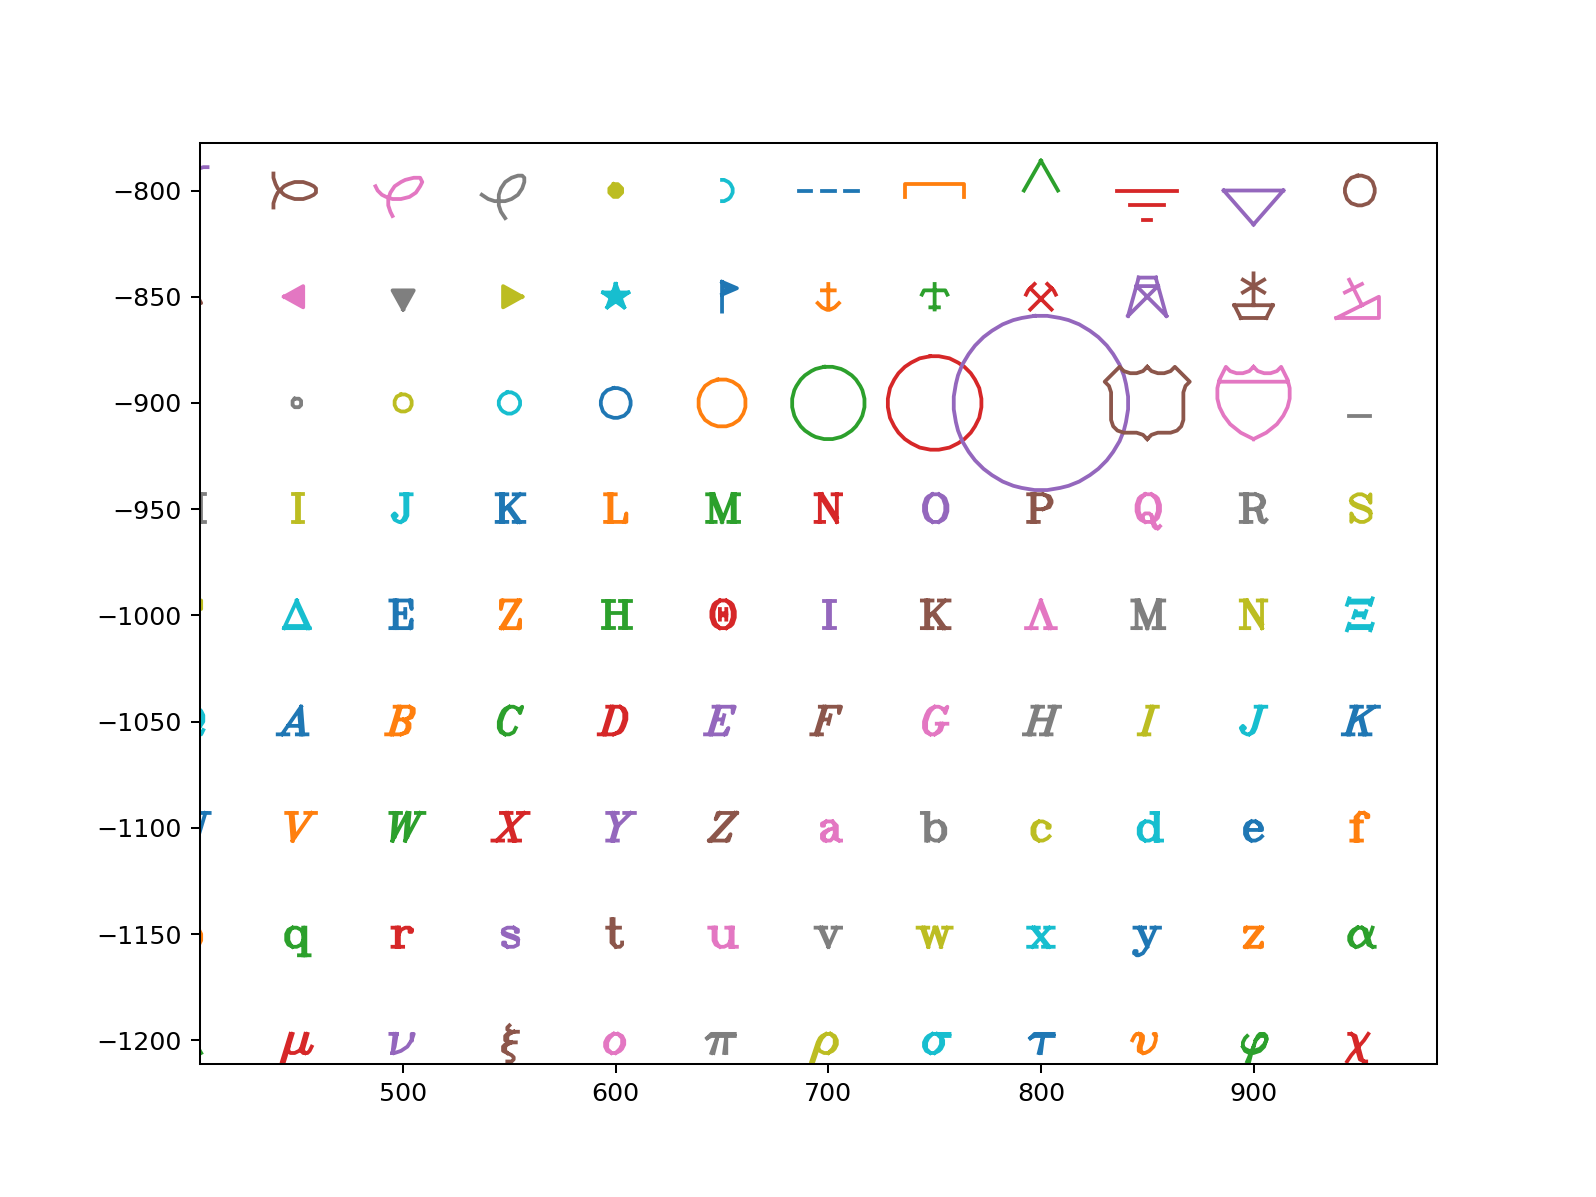

In [3]:
def draw(gid, x_o=0, y_o=0):
    gg = glyphs[gid]

    l = gg[0]
#     x_o -= l
    r = gg[1]
    w = r - l
    
    xx = gg[0::2][1:].astype(float)
    yy = gg[1::2][1:].astype(float)
    
    g_inds = (xx == -50) & (yy == 0)
    xx[g_inds] = nan
    yy[g_inds] = nan
    
    plot(xx + x_o, -yy + y_o, '-')
    return r

plot()
axis('equal')

xp = 0
yp = 0
for k in sorted(glyphs.keys()):
    r = draw(k, xp, yp)
    xp += 50
    if (xp > 1000):
        xp = 0
        yp -= 50